In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
path = '../table_data/integrated_data2.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True, encoding = "UTF-8")
df.head()

,LOCATION,PHONE_NUMBER,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,LIVING_ROOM,AREA,APARTMENT_TYPE,PROJECT,INVESTOR,...,FURNITURE_TYPE,FURNITURE,CONVENIENT,PRICE,URL,RAW_DESCRIPTION,ENTITIES,FORMATTED_LOCATION,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,"đường vĩnh phúc, phường vĩnh phúc, quận ba đìn...",098285***,môi giới,3.0,2.0,1.0,80.0,tập thể,NaN,NaN,...,NaN,"['có_điều hoà', ' nóng lạnh', ' giường', ' tủ'...",[],7.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,chính chủ cho thuê căn hộ 3 mặt thoáng tại vĩn...,"[['<unk> phúc tiện', 'LOC'], ['80', 'AREA'], [...","Vĩnh Phúc, Ba Đình, Hà Nội, Vietnam",21.041731,105.809950
1,"đường phạm ngọc thạch, phường láng hạ, quận đố...",088833***,cá nhân,2.0,1.0,NaN,48.0,chung_cư,NaN,NaN,...,NaN,[],"['trường', 'đại_học', 'bệnh_viện']",7.5,https://nha.chotot.com/ha-noi/quan-dong-da/thu...,"cho thuê căn hộ chung cư chính chủ, mặt đường...","[['căn_hộ chung_cư', 'APART'], ['đường phạm ng...","P.Phạm Ngọc Thạch, Đống Đa, Hà Nội, Vietnam",21.008615,105.834091
2,"a6, phố 8/3, phường quỳnh mai, quận hai bà trư...",098441***,cá nhân,1.0,1.0,NaN,40.0,tập_thể chung_cư,NaN,NaN,...,NaN,[],"['ngõ rộng', 'bệnh_viện']",5.0,https://nha.chotot.com/ha-noi/quan-hai-ba-trun...,"chính chủ cho thuê căn hộ tập thể 8/3 nhà a6, ...","[['căn_hộ tập_thể', 'APART'], ['nhà a6, tầng 1...","104 A6 Phố 8/3, Quỳnh Mai, Hai Bà Trưng, Hà Nộ...",20.999548,105.860602
3,"đào tấn, phường ngọc hà, quận ba đình, hà nội",091552***,môi giới,1.0,1.0,NaN,30.0,studio,NaN,NaN,...,nội thất đầy đủ,"['điều_hoà', 'giường tủ', 'nóng lạnh', 'bàn bế...",['trung_tâm thương_mại'],4.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,studio 25m2 tại ngõ 118 đào tấn\nnhà full nội ...,"[['studio', 'APART'], ['25m2', 'AREA'], ['ngõ ...","Đào Tấn, Ba Đình, Hà Nội, Vietnam",21.032594,105.808742
4,"ngõ 12, đào tấn, phường cống vị, quận ba đình,...",091552***,môi giới,1.0,1.0,NaN,30.0,chung_cư,NaN,NaN,...,nội thất đầy đủ,"['điều_hoà', ' giường tủ', 'nóng lạnh', ' bàn ...","['xe để dưới hầm free', 'cổng khoá vân tay', '...",4.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,cho thuê căn hộ dịch vụ đủ đồ giá chỉ 4tr5 ở đ...,"[['căn_hộ dịch_vụ', 'APART'], ['45 ở đào', 'PR...","Ng. 12 Phố Đào Tấn, Cống Vị, Ba Đình, Hà Nội, ...",21.033861,105.809472


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16916 entries, 0 to 16915
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LOCATION            16891 non-null  object 
 1   PHONE_NUMBER        16840 non-null  object 
 2   NEWS_TYPE           16916 non-null  object 
 3   BEDROOM_NUMBER      16764 non-null  float64
 4   BATH_ROOM_NUMBER    10843 non-null  float64
 5   LIVING_ROOM         3945 non-null   float64
 6   AREA                16916 non-null  object 
 7   APARTMENT_TYPE      12151 non-null  object 
 8   PROJECT             12650 non-null  object 
 9   INVESTOR            0 non-null      float64
 10  FLOOR               5596 non-null   float64
 11  FURNITURE_TYPE      10944 non-null  object 
 12  FURNITURE           16916 non-null  object 
 13  CONVENIENT          16916 non-null  object 
 14  PRICE               16740 non-null  object 
 15  URL                 16916 non-null  object 
 16  RAW_

# Visualize missing value raw

In [35]:
def missing_percent(df):
    nan_percent= 100 * (df.isnull().sum()/len(df))
    # nan_percent= nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

LOCATION                0.147789
PHONE_NUMBER            0.449279
NEWS_TYPE               0.000000
BEDROOM_NUMBER          0.898558
BATH_ROOM_NUMBER       35.900922
LIVING_ROOM            76.678884
AREA                    0.000000
APARTMENT_TYPE         28.168598
PROJECT                25.218728
INVESTOR              100.000000
FLOOR                  66.918893
FURNITURE_TYPE         35.303854
FURNITURE               0.000000
CONVENIENT              0.000000
PRICE                   1.040435
URL                     0.000000
RAW_DESCRIPTION         1.371483
ENTITIES                0.000000
FORMATTED_LOCATION      3.475999
LATITUDE                3.475999
LONGITUDE               3.475999
dtype: float64

In [36]:
bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['INVESTOR', 'PHONE_NUMBER', 'RAW_DESCRIPTION', 'FORMATTED_LOCATION', 'FURNITURE', 'CONVENIENT', 'ENTITIES', 'URL']:
    bar_x.append(x[0])
    bar_y.append(x[1])

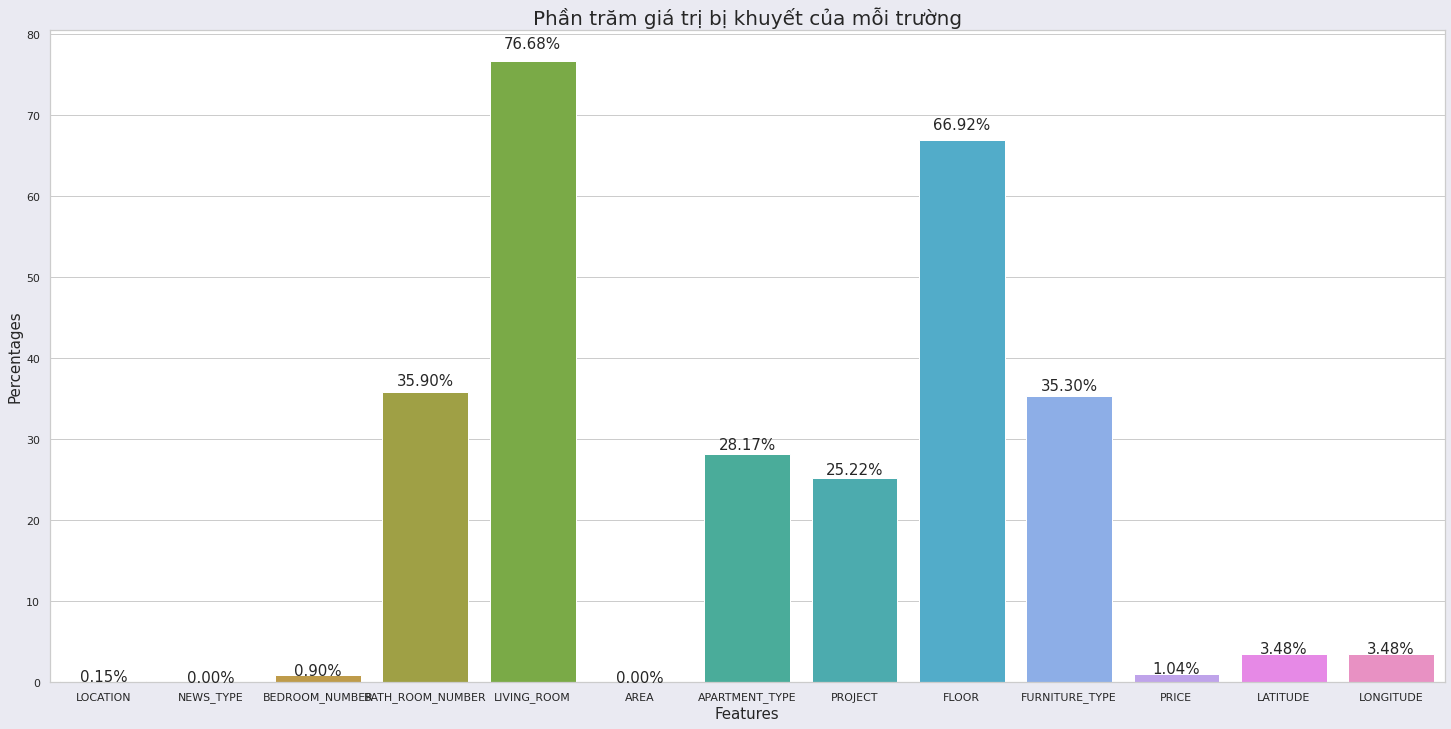

In [37]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(25, 12), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Phần trăm giá trị bị khuyết của mỗi trường', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

# Process furniture type, furniture

In [38]:
df['FURNITURE_TYPE'].value_counts(), df['FURNITURE_TYPE'].isnull().sum()

(full                7121
 nội thất đầy đủ     1396
 cơ_bản              1326
 nội thất cao cấp     662
 nhà trống            142
 nguyên_bản           100
 full cơ_bản           69
 full cao_cấp          57
 cao_cấp               39
 cơ_bản full           21
 cao_cấp full          10
 cao_cấp cơ_bản         1
 Name: FURNITURE_TYPE, dtype: int64,
 5972)

In [39]:
#df['FURNITURE_TYPE'] = df['FURNITURE_TYPE'].astype("string")
for i in range(df.shape[0]):
  temp = str(df.iloc[i]['FURNITURE_TYPE'])
  if temp == 'cơ_bản' or temp == 'cơ bản' or temp == 'full cơ_bản' or temp == 'full cơ bản' or temp == 'cơ_bản full':
      df['FURNITURE_TYPE'][i] = 'cơ bản'
  if temp == 'nhà trống':
      df['FURNITURE_TYPE'][i] = 'nguyên bản'
  if temp == 'nguyên_bản' or temp == 'nguyên bản':
      df['FURNITURE_TYPE'][i] = 'nguyên bản'
  if temp == 'nội thất cao cấp' or temp == 'full cao_cấp' or temp == 'cao_cấp' or temp == 'cao_cấp full' or temp == 'cao_cấp cơ_bản':
      df['FURNITURE_TYPE'][i] = 'full cao cấp'
  if temp == 'nội thất đầy đủ':
      df['FURNITURE_TYPE'][i] = 'full'
for i in range(df.shape[0]):
  if isinstance(df.iloc[i]['FURNITURE_TYPE'], float):
    temp = str(df.iloc[i]['ENTITIES']) + str(df.iloc[i]['RAW_DESCRIPTION']) + str(df.iloc[i]['PROJECT'])
    if 'cơ_bản' in temp or 'cơ bản' in temp or 'full cơ_bản' in temp or 'full cơ bản' in temp or 'cơ_bản full' in temp:
        df['FURNITURE_TYPE'][i] = 'cơ bản'
    elif 'nhà trống' in temp:
        df['FURNITURE_TYPE'][i] = 'nguyên bản'
    elif 'nguyên_bản' in temp or 'nguyên bản' in temp:
        df['FURNITURE_TYPE'][i] = 'nguyên bản'
    elif 'nội thất cao cấp' in temp  or 'full cao_cấp' in temp or 'cao_cấp' in temp or 'cao_cấp full' in temp or 'cao_cấp cơ_bản' in temp:
        df['FURNITURE_TYPE'][i] = 'full cao cấp'
    elif 'nội thất đầy đủ' in temp:
        df['FURNITURE_TYPE'][i] = 'full'
    # else:
    #     df['FURNITURE_TYPE'][i] = 'no information'

In [40]:
df['FURNITURE_TYPE'].isnull().sum()

3979

In [41]:
df['FURNITURE_TYPE'].fillna('unk', inplace=True)

In [42]:
df['FURNITURE_TYPE'].value_counts()

full            8835
unk             3979
cơ bản          2565
full cao cấp    1216
nguyên bản       321
Name: FURNITURE_TYPE, dtype: int64

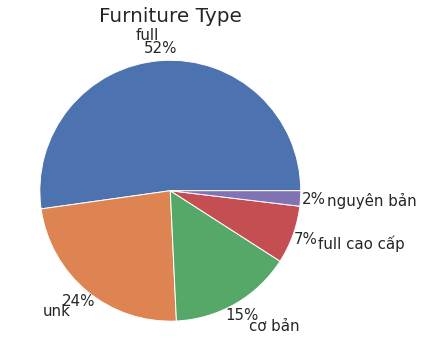

In [43]:
plt.subplots(figsize=(10,6))
df['FURNITURE_TYPE'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, fontsize=15)
plt.axis('off')
plt.title('Furniture Type', fontsize=20)
plt.show()

In [44]:
nguyen_ban = ['thiết bị vệ sinh', 'bàn bếp', 'tủ bếp'] # đồ của chủ đầu tư
co_ban = nguyen_ban + ['tủ đồ', 'nóng lạnh', 'giường tủ', 'bàn ghế'] # design cơ bản đồ đạc
full = nguyen_ban + co_ban + ['hút mùi', 'sàn gỗ', 'rèm phơi', 'lò vi sóng', 'máy giặt', 'tivi', 'điều hòa']

In [45]:
for i in range(df.shape[0]):
    if str(df.iloc[i]['FURNITURE']) == '[]':
      if str(df.iloc[i]['FURNITURE_TYPE']) == 'full':
        df['FURNITURE'][i] = str(full)
      if str(df.iloc[i]['FURNITURE_TYPE']) == 'nguyên bản':
        df['FURNITURE'][i] = str(nguyen_ban)
      if str(df.iloc[i]['FURNITURE_TYPE']) == 'cơ bản':
        df['FURNITURE'][i] = str(co_ban)

# Process area and price

In [46]:
import string
punc = list(string.punctuation.replace(',','').replace('.','') + 'abcdefghyklmnopqrstuvwxyz')
for i in range(df.shape[0]):
    if any(p in str(df['AREA'][i]) for p in punc):  
        print(df['AREA'][i]) 
        #drop wrong label
        df['AREA'] = df['AREA'].drop(index=i)
for i in range(df.shape[0]):
    if any(p in str(df['PRICE'][i]) for p in punc):  
        print(df['PRICE'][i]) 

05/12/20
05/12/20
05/12/20
30/11/20
05/12/20
04/12/20
30/11/20
04/12/20
03/12/20
03/12/20
30/11/20
03/12/20
03/12/20
03/12/20
29/11/20
29/11/20
nan
['8,5 triệuthá', 'PRICE']
nan
['7,5 triệu', 'PRICE']
nan
nan
['9xx/ngày', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/tháng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
['8 triệu đến 16 triệu/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
nan
nan
['17 ~ triệ', 'PRICE']
nan
['4tr5 đến 6tr', 'PRICE']
['5 - 12 triệu/', 'PRICE']
nan
['15 triệu/tháng', 'PRICE']
['9 triệu/tháng.', 'PRICE']
nan
['5.5 triệu/thá', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/tháng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
['8 triệu đến 16 triệu/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
nan
nan
['17 ~ triệ', 'PRICE']
nan
['4tr5 đến 6tr', 'PRICE']
['5 - 12 triệu/', 'PRICE']
nan
['15 triệu/tháng', 'PRICE']
['9 triệu/tháng.', 'PRICE']
nan
['5.5 triệu/thá', 'PRICE']
['6,5 t

In [47]:
import re
def convert_obj_to_float(df, field):
    form = "[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?"
    for i in range(df.shape[0]):
        if isinstance(df[field][i], str):
            temp = re.findall(form, df[field][i].replace(',','.').replace('m2','').replace(' tr ','.').replace('tr','.').replace('00.000','.'))
            if not len(temp):
                df[field] = df[field].drop(index=i)
            else:
                temp_ = 0.0
                for t in temp:
                    temp_ += float(t[0])
                df[field][i] = temp_/len(temp)
        if isinstance(df[field][i], int):
            df[field][i] = float(df[field][i])
    df[field] = df[field].astype('float')
convert_obj_to_float(df, 'PRICE')
convert_obj_to_float(df, 'AREA')

In [48]:
df['PRICE'].isnull().sum()

192

In [49]:
df['AREA'].isnull().sum()

16

# Process apartment type, furniture, furniture type, room

In [50]:
# chung cư ở bình thường: 0
# chung cư tập thể: 1
# chung cư mini: 2
# studio: 3
# other (chung cư cao cấp: officetel, duplex, penhouse): 4
print(df['APARTMENT_TYPE'].unique())
for i in range(df.shape[0]):
    if 'duplex' in str(df['APARTMENT_TYPE'][i]):
        df['APARTMENT_TYPE'][i] = 'chung cư cao cấp'
    elif 'officetel' in str(df['APARTMENT_TYPE'][i]):
        df['APARTMENT_TYPE'][i] = 'chung cư cao cấp'
    elif 'studio' in str(df['APARTMENT_TYPE'][i]):
        df['APARTMENT_TYPE'][i] = 'chung cư studio'
    elif 'penhouse' in str(df['APARTMENT_TYPE'][i]):
        df['APARTMENT_TYPE'][i] = 'chung cư cao cấp'
    elif 'mini' in str(df['APARTMENT_TYPE'][i]) or 'ccmn' in str(df['APARTMENT_TYPE'][i]):
        df['APARTMENT_TYPE'][i] = 'chung cư mini'
    elif 'tập_thể' in str(df['APARTMENT_TYPE'][i]) or 'tập thể' in str(df['APARTMENT_TYPE'][i]):
        df['APARTMENT_TYPE'][i] = 'chung cư tập thể'
    else:
        df['APARTMENT_TYPE'][i] = 'chung cư thường'

['tập thể' 'chung_cư' 'tập_thể chung_cư' 'studio' 'ccmn' 'căn hộ dịch vụ'
 'mini chung_cư' 'chung cư' 'studio chung_cư' 'chung_cư cao_cấp'
 'chung_cư studio cao_cấp' 'mini' 'penthouse' 'chung_cư ccmn' 'duplex'
 'studio mini chung_cư' nan 'tập_thể' 'cao_cấp' 'penhouse chung_cư'
 'chung_cư mini cao_cấp' 'cao_cấp chung_cư' 'officetel' 'cao_cấp ccmn'
 'studio cao_cấp' 'studio ccmn' 'chung_cư cao_cấp ccmn' 'chung_cư studio'
 'cao_cấp chung_cư studio' 'penhouse' 'cao_cấp studio' 'ccmn chung_cư'
 'chung_cư penhouse' 'ccmn cao_cấp']


In [51]:
df['APARTMENT_TYPE'].value_counts()

chung cư thường     14887
chung cư mini         891
chung cư studio       625
chung cư tập thể      488
chung cư cao cấp       25
Name: APARTMENT_TYPE, dtype: int64

In [52]:
df['APARTMENT_TYPE'].isna().sum()

0

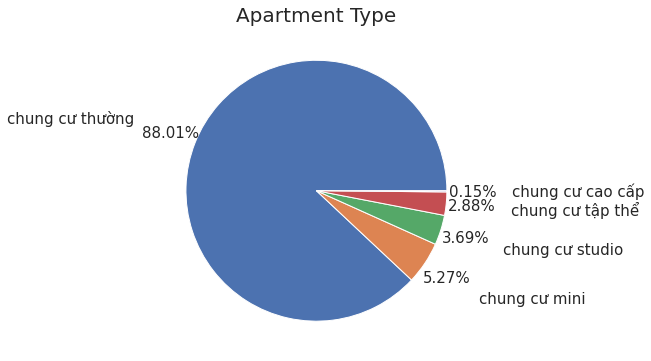

In [53]:
plt.subplots(figsize=(10,6))
df['APARTMENT_TYPE'].value_counts().plot(kind='pie', autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5, fontsize=15)
plt.axis('off')
plt.title('Apartment Type', fontsize=20)
plt.show()

In [54]:
def room(df, field, f1, f2, f3):
    null_list = list(df[field].isnull())
    for i in range(df.shape[0]):
        if null_list[i]:
            info = str(df.loc[i]['ENTITIES']) + str(df.loc[i]['RAW_DESCRIPTION']) + str(df.loc[i]['PROJECT'])
            try:
                idx_1 = info.index(f1)
                idx_2 = info.index(f2)
                idx_3 = info.index(f3)
                t1 = re.findall('\d+', info[idx_1-2:idx_1+length(f1)])[0]
                t2 = re.findall('\d+', info[idx_2-2:idx_2+lenght(f2)])[0]
                t3 = re.findall('\d+', info[idx-3-2:idx_3+length(f3)])[0]
                if isinstance(float(t1),float):
                    df[field][i] = float(t1)
                elif isinstance(float(t2),float):
                    df[field][i] = float(t2)
                elif isinstance(float(t3),float):
                    df[field][i] = float(t3)
            except:
                pass
room(df, 'LIVING_ROOM', 'phòng khách', 'phòng_khách', 'pk')
room(df, 'BATH_ROOM_NUMBER', 'phòng tắm', 'phòng_tắm', 'pt')
room(df, 'BEDROOM_NUMBER', 'phòng ngủ', 'phòng_ngủ', 'pn')

In [55]:
df['BATH_ROOM_NUMBER'].isnull().sum()
# consider

6073

In [56]:
df['BEDROOM_NUMBER'].isnull().sum()

152

In [57]:
# drop living room feature
df['LIVING_ROOM'].isnull().sum()

12971

## drop bedroom if > 10. Why do not use box plot

In [58]:
"""
print(df['BEDROOM_NUMBER'].value_counts())
plt.subplots(figsize=(10,6))
df['BEDROOM_NUMBER'].value_counts()[:5].plot(kind='pie')

#process outlier 
for i in range(df.shape[0]):
    if df['BEDROOM_NUMBER'][i] != 'no information' and float(df['BEDROOM_NUMBER'][i]) > 10:
        df = df.drop(index=i)
"""

"\nprint(df['BEDROOM_NUMBER'].value_counts())\nplt.subplots(figsize=(10,6))\ndf['BEDROOM_NUMBER'].value_counts()[:5].plot(kind='pie')\n\n#process outlier \nfor i in range(df.shape[0]):\n    if df['BEDROOM_NUMBER'][i] != 'no information' and float(df['BEDROOM_NUMBER'][i]) > 10:\n        df = df.drop(index=i)\n"

In [59]:
"""
print(df['BATH_ROOM_NUMBER'].value_counts())
plt.subplots(figsize=(12,8))
df['BATH_ROOM_NUMBER'].value_counts()[:4].plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
"""

"\nprint(df['BATH_ROOM_NUMBER'].value_counts())\nplt.subplots(figsize=(12,8))\ndf['BATH_ROOM_NUMBER'].value_counts()[:4].plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)\n"

# Visualize processed missing value

In [60]:
def missing_percent(df):
    nan_percent = 100*(df.isnull().sum()/len(df))
    # nan_percent = nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

LOCATION                0.147789
PHONE_NUMBER            0.449279
NEWS_TYPE               0.000000
BEDROOM_NUMBER          0.898558
BATH_ROOM_NUMBER       35.900922
LIVING_ROOM            76.678884
AREA                    0.094585
APARTMENT_TYPE          0.000000
PROJECT                25.218728
INVESTOR              100.000000
FLOOR                  66.918893
FURNITURE_TYPE          0.000000
FURNITURE               0.000000
CONVENIENT              0.000000
PRICE                   1.135020
URL                     0.000000
RAW_DESCRIPTION         1.371483
ENTITIES                0.000000
FORMATTED_LOCATION      3.475999
LATITUDE                3.475999
LONGITUDE               3.475999
dtype: float64

In [61]:
bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['INVESTOR', 'PHONE_NUMBER', 'RAW_DESCRIPTION', 'FORMATTED_LOCATION', 'FURNITURE', 'CONVENIENT', 'ENTITIES', 'URL']:
    bar_x.append(x[0])
    bar_y.append(x[1])

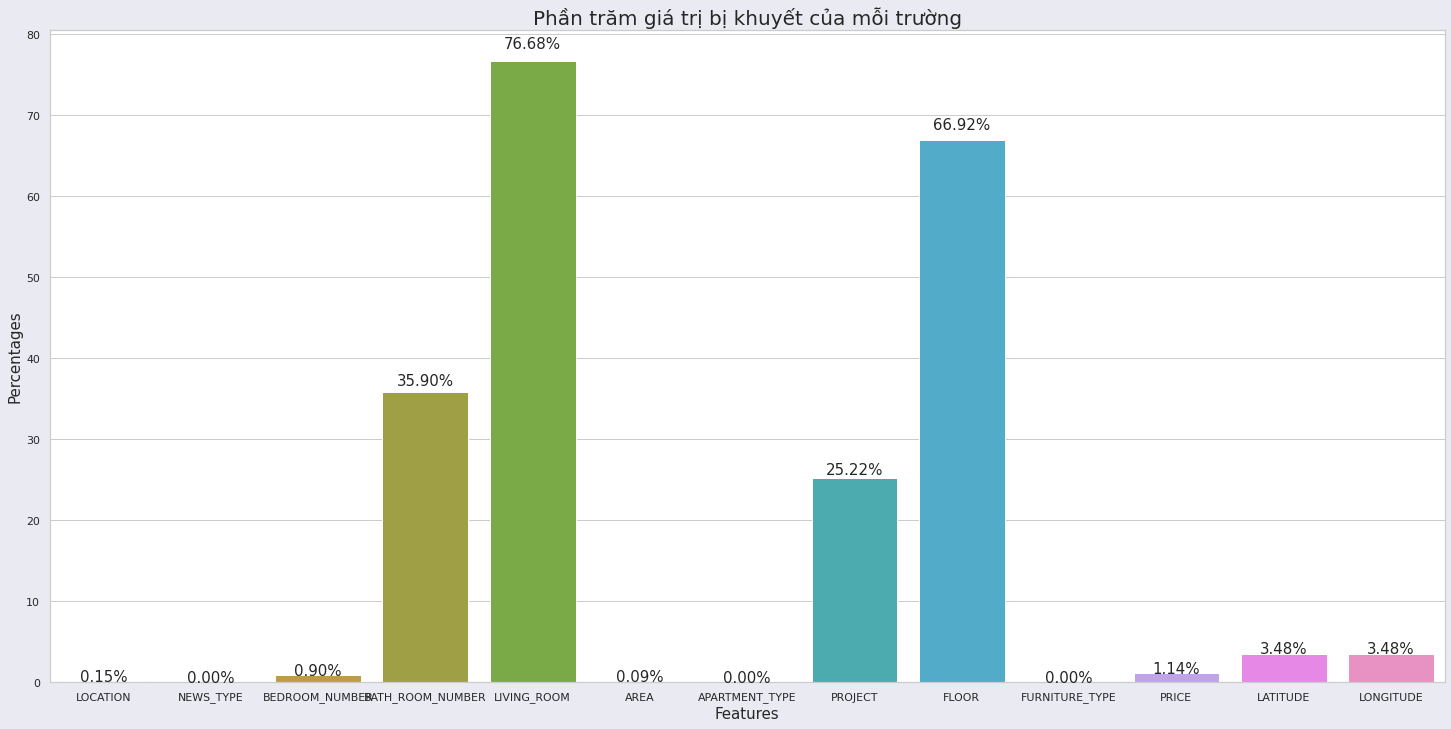

In [62]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(25, 12), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Phần trăm giá trị bị khuyết của mỗi trường', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

## Drop useless columns

In [68]:
dropped_df = df.drop(columns = ['PHONE_NUMBER', 'PROJECT', 'INVESTOR', 'FLOOR', 'RAW_DESCRIPTION', 'LOCATION', 'URL', 'ENTITIES', 'CONVENIENT', 'FORMATTED_LOCATION', 'CONVENIENT', 'FURNITURE', 'LIVING_ROOM'])

In [69]:
dropped_df.columns

Index(['NEWS_TYPE', 'BEDROOM_NUMBER', 'BATH_ROOM_NUMBER', 'AREA',
       'APARTMENT_TYPE', 'FURNITURE_TYPE', 'PRICE', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [70]:
dropped_df.head()

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
0,môi giới,3.0,2.0,80.0,chung cư tập thể,unk,7.5,21.041731,105.809950
1,cá nhân,2.0,1.0,48.0,chung cư thường,unk,7.5,21.008615,105.834091
2,cá nhân,1.0,1.0,40.0,chung cư tập thể,unk,5.0,20.999548,105.860602
3,môi giới,1.0,1.0,30.0,chung cư studio,full,4.5,21.032594,105.808742
4,môi giới,1.0,1.0,30.0,chung cư thường,full,4.5,21.033861,105.809472


192

# Unvariate Outlier Detection

## price outlier

[(0.0, 30.0)]

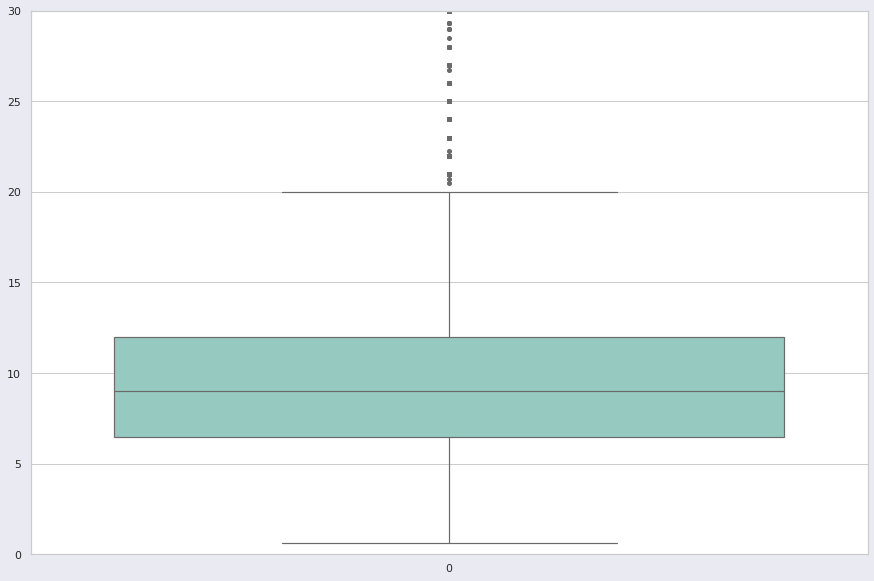

In [73]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)

# print(df['PRICE'].sort_values(ascending=False))

ax = sns.boxplot(data=dropped_df['PRICE'],
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 30))

In [75]:
dropped_df.query('PRICE >= 20 & PRICE <= 50')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
9,môi giới,3.0,2.0,118.0,chung cư thường,full,21.0,20.997276,105.867104
196,cá nhân,3.0,2.0,136.0,chung cư thường,full cao cấp,23.0,20.999558,105.814575
221,môi giới,2.0,2.0,74.0,chung cư thường,full,22.0,21.032055,105.814083
319,môi giới,3.0,2.0,115.0,chung cư thường,full cao cấp,20.0,20.999773,105.814532
343,cá nhân,3.0,3.0,220.0,chung cư thường,full,46.0,21.011068,105.849483
...,...,...,...,...,...,...,...,...,...
16697,môi giới,3.0,NaN,130.0,chung cư thường,full cao cấp,25.0,21.030065,105.822659
16808,môi giới,2.0,NaN,115.0,chung cư thường,full,23.0,21.004945,105.798086
16814,môi giới,3.0,2.0,130.0,chung cư thường,full,25.0,21.000560,105.802918


In [ ]:
dropped_df['PRICE'].isnull().sum()

In [76]:
# Remove data points that have null price values or outlier values
dropped_df = dropped_df[~dropped_df['PRICE'].isnull()]

In [78]:
dropped_df = dropped_df.loc[dropped_df['PRICE'] <= 50]

In [79]:
len(dropped_df)

16682

## area outlier

[(0.0, 300.0)]

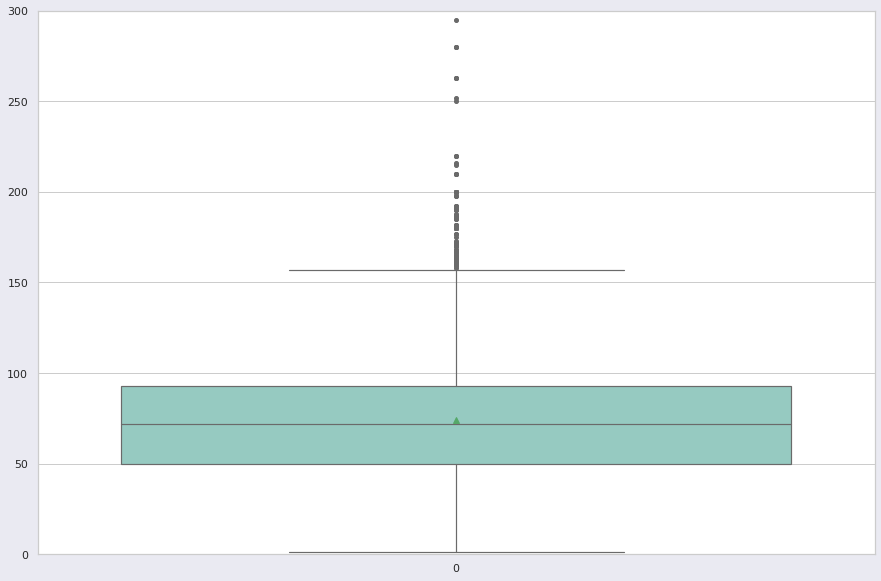

In [82]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)

ax = sns.boxplot(data=dropped_df['AREA'],
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 300))

In [84]:
dropped_df['AREA'].max()

826.0

In [83]:
dropped_df.query('AREA >= 150 & AREA <= 300')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
169,môi giới,4.0,3.0,182.0,chung cư thường,full,14.0,21.030229,105.776573
343,cá nhân,3.0,3.0,220.0,chung cư thường,full,46.0,21.011068,105.849483
358,môi giới,3.0,2.0,150.0,chung cư thường,unk,16.0,21.017006,105.815086
372,môi giới,4.0,3.0,192.0,chung cư thường,full,17.0,21.030229,105.776573
447,cá nhân,5.0,4.0,295.0,chung cư thường,full cao cấp,48.0,21.085260,105.816961
...,...,...,...,...,...,...,...,...,...
16538,môi giới,4.0,NaN,177.0,chung cư thường,unk,48.0,21.057969,105.797542
16587,môi giới,4.0,NaN,210.0,chung cư thường,full,20.0,21.033392,105.797774
16619,môi giới,4.0,NaN,198.0,chung cư thường,unk,18.0,21.033102,105.778822


In [85]:
dropped_df.query('AREA > 300')

,NEWS_TYPE,BEDROOM_NUMBER,BATH_ROOM_NUMBER,AREA,APARTMENT_TYPE,FURNITURE_TYPE,PRICE,LATITUDE,LONGITUDE
Unnamed: 0,,,,,,,,,
558,môi giới,2.0,1.0,445.0,chung cư mini,unk,5.0,21.036819,105.780847
2068,cá nhân,5.0,5.0,442.0,chung cư thường,nguyên bản,50.0,21.039155,105.903994
11475,môi giới,2.0,NaN,826.0,chung cư thường,unk,12.0,20.997276,105.867104
12409,môi giới,5.0,NaN,320.0,chung cư thường,cơ bản,14.0,21.056117,105.865858


In [86]:
dropped_df['AREA'].isnull().sum()

16

In [87]:
# Remove data points that have null area values or outlier values
dropped_df = dropped_df[~dropped_df['AREA'].isnull()]
dropped_df = dropped_df.loc[dropped_df['AREA'] <= 300]

In [88]:
len(dropped_df)

16662

## correlation and describe

In [380]:
df_float = df.loc[df['BEDROOM_NUMBER'] != 'no information']
df_float = df_float.loc[df_float['LIVING_ROOM'] != 'no information']
df_float = df_float.loc[df_float['BATH_ROOM_NUMBER'] != 'no information']
df_float['BEDROOM_NUMBER'] = df_float['BEDROOM_NUMBER'].astype("float")
df_float['LIVING_ROOM'] = df_float['LIVING_ROOM'].astype("float")
df_float['BATH_ROOM_NUMBER'] = df_float['BATH_ROOM_NUMBER'].astype("float")

In [381]:
non_num_cols = [col for col in df_float.columns if df_float[col].dtype == 'O']
non_num_data = df_float[non_num_cols]

In [382]:
num_cols = list(set(df_float.columns) - set(non_num_cols))
num_cols

['LIVING_ROOM',
 'PRICE',
 'LATITUDE',
 'AREA',
 'LONGITUDE',
 'BATH_ROOM_NUMBER',
 'BEDROOM_NUMBER']

In [383]:
df_num = df_float[num_cols]
df_num.describe()

,LIVING_ROOM,PRICE,LATITUDE,AREA,LONGITUDE,BATH_ROOM_NUMBER,BEDROOM_NUMBER
count,3174.000000,3174.000000,3095.000000,3174.000000,3095.000000,3174.000000,3174.000000
mean,1.000315,9.602515,21.006269,79.403388,105.808910,1.548519,2.130750
std,0.017750,3.759148,0.366465,26.923100,0.045428,0.524841,0.666789
min,1.000000,0.625000,10.774781,1.102000,105.691437,1.000000,1.000000
25%,1.000000,7.000000,21.003230,60.000000,105.786322,1.000000,2.000000
50%,1.000000,9.000000,21.018138,76.000000,105.803384,2.000000,2.000000
75%,1.000000,12.000000,21.033369,95.000000,105.822165,2.000000,3.000000
max,2.000000,29.000000,21.203269,181.000000,106.729798,4.000000,6.000000


In [384]:
df_num.corr()

,LIVING_ROOM,PRICE,LATITUDE,AREA,LONGITUDE,BATH_ROOM_NUMBER,BEDROOM_NUMBER
LIVING_ROOM,1.000000,-0.019377,0.000022,-0.019391,0.004605,-0.018557,-0.003482
PRICE,-0.019377,1.000000,0.035056,0.627970,-0.068831,0.383970,0.459825
LATITUDE,0.000022,0.035056,1.000000,0.038147,-0.712878,0.020334,0.004727
AREA,-0.019391,0.627970,0.038147,1.000000,-0.151483,0.534708,0.759920
LONGITUDE,0.004605,-0.068831,-0.712878,-0.151483,1.000000,-0.121887,-0.100896
BATH_ROOM_NUMBER,-0.018557,0.383970,0.020334,0.534708,-0.121887,1.000000,0.488433
BEDROOM_NUMBER,-0.003482,0.459825,0.004727,0.759920,-0.100896,0.488433,1.000000


## visualize

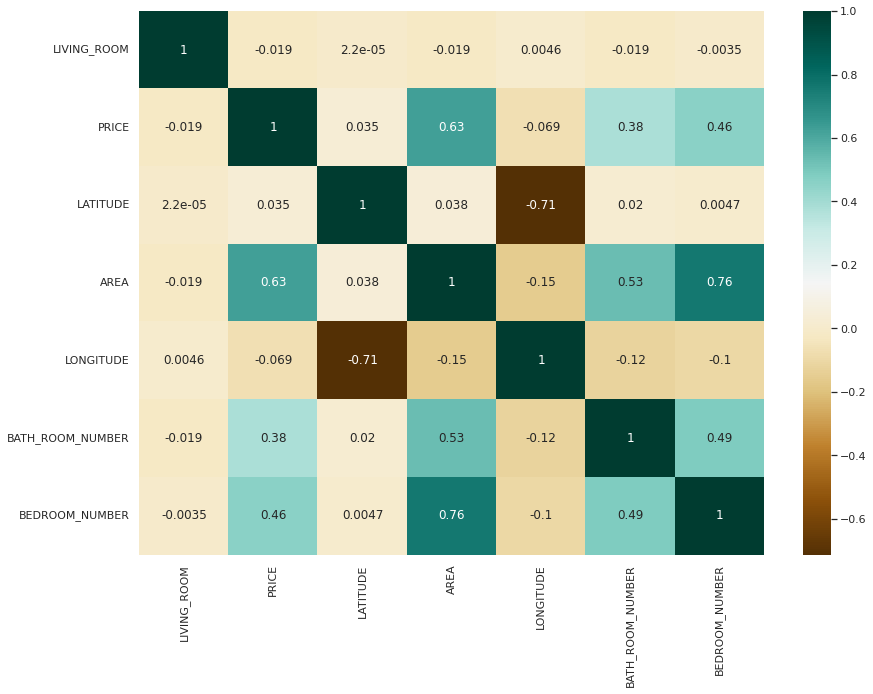

In [385]:
plt.figure(figsize = (14,10))
g = sns.heatmap(df_num.corr(), cmap = 'BrBG', annot = True)

Giá căn hộ môi giới trung bình:  11.135124704491727
Giá căn hộ cá nhân trung bình:  9.403497152156225


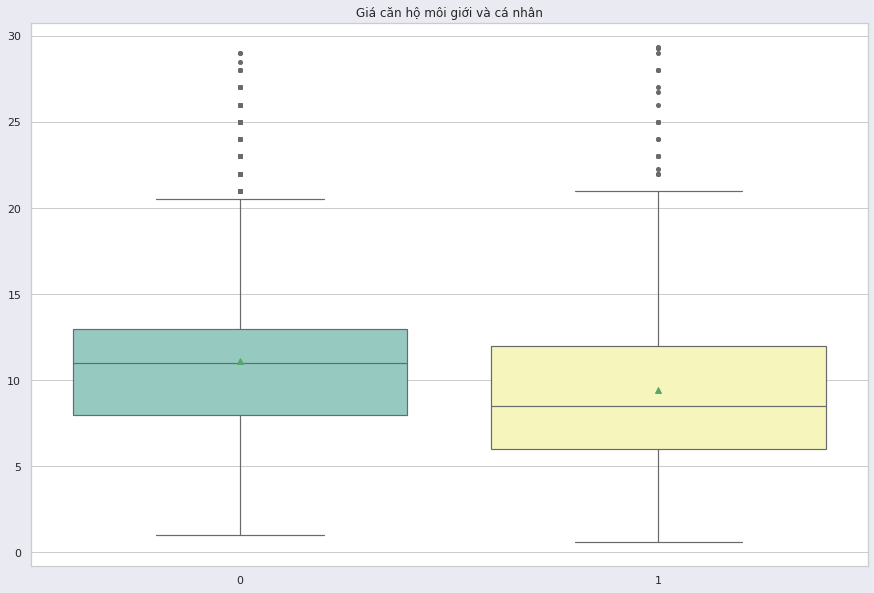

In [386]:
moi_gioi = df.loc[df['NEWS_TYPE'] == 'môi giới']
ca_nhan = df.loc[df['NEWS_TYPE'] == 'cá nhân']
print('Giá căn hộ môi giới trung bình: ', moi_gioi['PRICE'].mean())
print('Giá căn hộ cá nhân trung bình: ', ca_nhan['PRICE'].mean())

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)
plt.title('Giá căn hộ môi giới và cá nhân')
ax = sns.boxplot(data=[moi_gioi['PRICE'], ca_nhan['PRICE']], 
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 order=None,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))

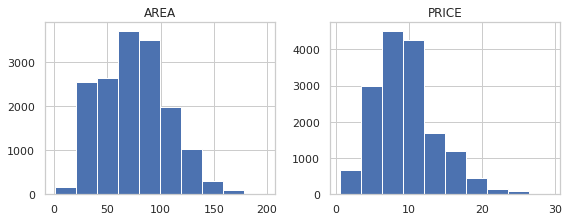

In [387]:
df[['AREA', 'PRICE']].hist(layout = (7,3), figsize = (12, 20))
plt.tight_layout()

[(105.5, 106.0)]

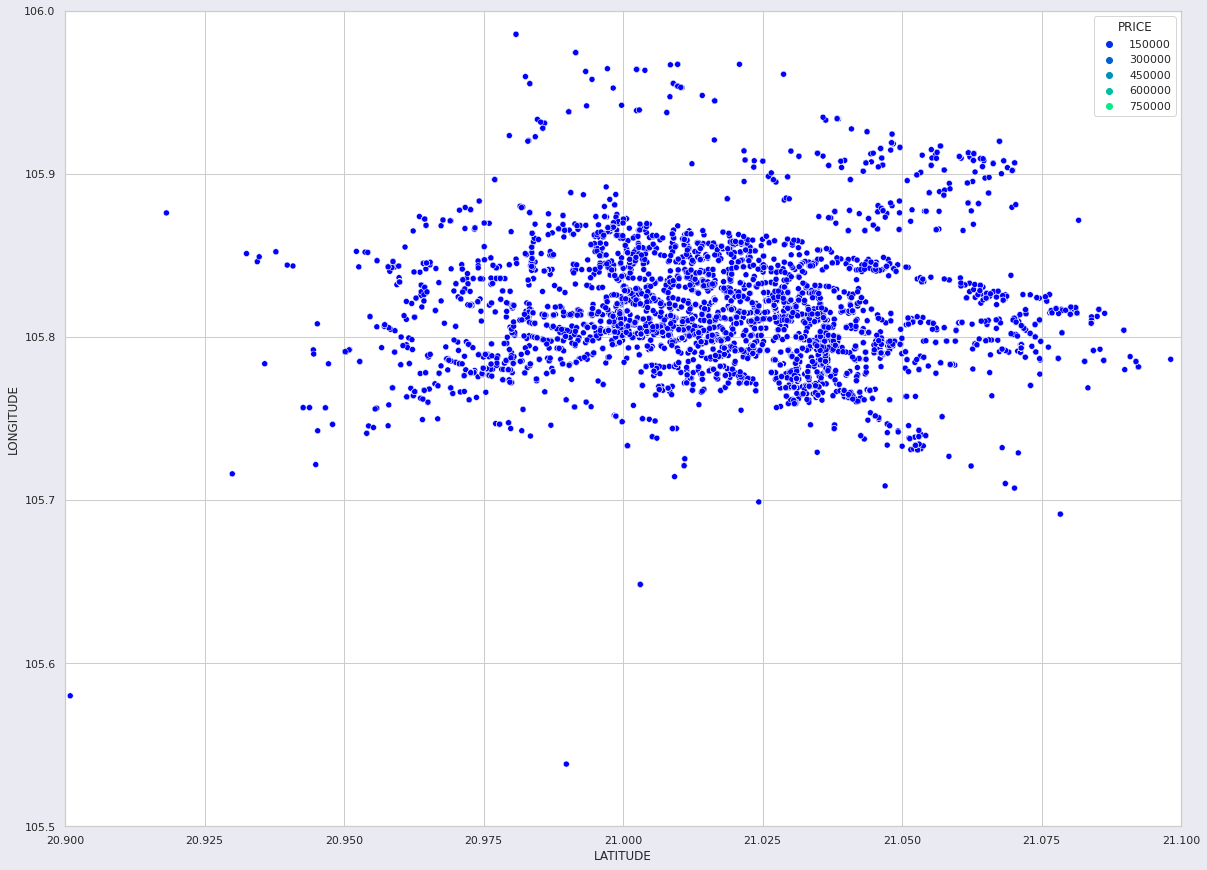

In [90]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

ax = sns.scatterplot(x=df['LATITUDE'], y=df['LONGITUDE'], hue=df['PRICE'], palette='winter')
ax.set(xlim=(20.9,21.1))
ax.set(ylim=(105.5,106))

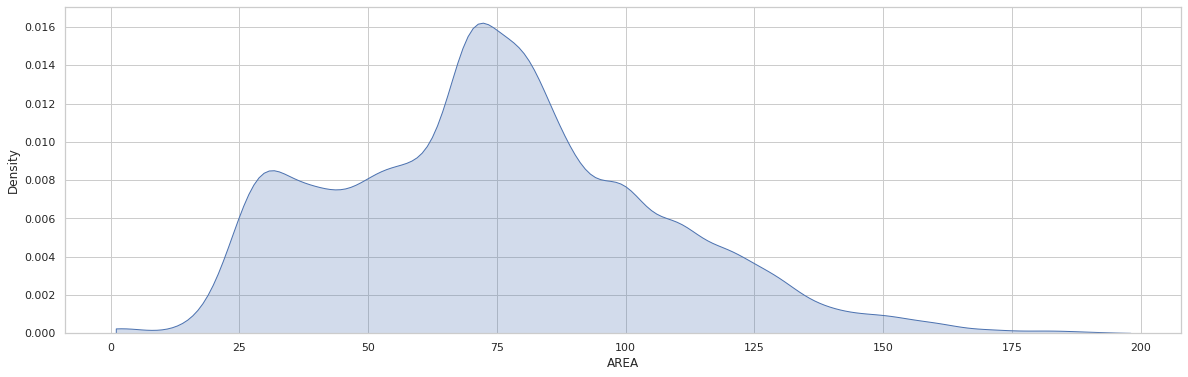

In [400]:
#histogram
# KDE plot
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.kdeplot(data=df['AREA'], shade=True, clip=(min(df['AREA']), max(df['AREA'])))

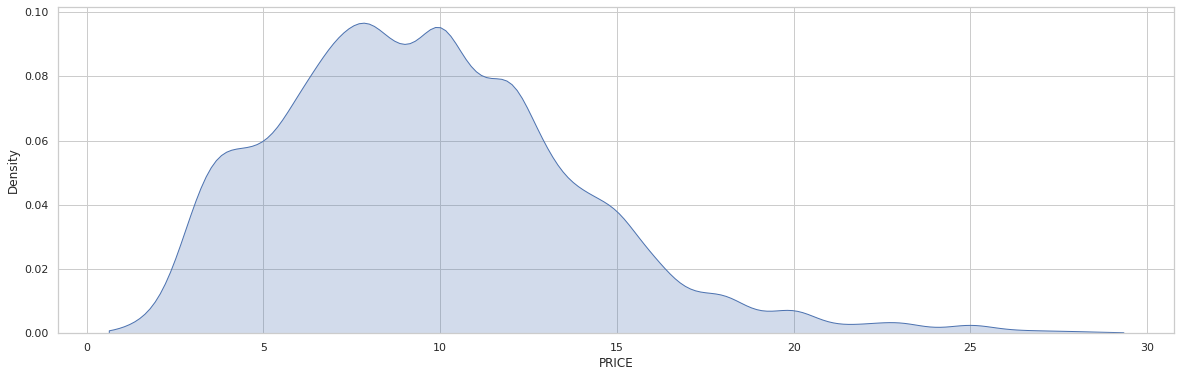

In [401]:
#histogram
# KDE plot
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.kdeplot(data=df['PRICE'], shade=True, clip=(min(df['PRICE']), max(df['PRICE'])))

In [ ]:
df.to_csv('processed.csv')